# Lab 5.6b

Goals:
 
* Use `if` statements to control the flow of a program
* Import and manipulate data from a CSV file
* Compute the squared error of a linear approximation
* Use `sympy` to calculate the line of best fit



Here are your libraries.


In [1]:
import numpy as np
import urllib.request as request
import matplotlib.pyplot as plt
import csv
import codecs
import sympy

Here is the world development indicators data from 2018, compiled by the world bank.

In [2]:
# get a file from a website
wdi=request.urlopen('https://math.emory.edu/~mpcarr/math210/labs/data/wdi.csv')
# read that file as a csv file
csvfile = csv.reader(codecs.iterdecode(wdi, 'utf-8'))
# save the data in the csv file as a python list
csv=list(csvfile)

Here is the test function `isNumeric()` that you used in the prelab.

In [3]:
def isNumeric(s):
   try:
      s = float(s)
      return True
   except:
      return False

In the Prelab, we used only the first two columns of the WDI data.  There are more columns though, and we can read their headers from the first row.

In [4]:
csv[0]

['Country Name',
 'Country Code',
 'Adjusted net national income per capita (current US$) [NY.ADJ.NNTY.PC.CD]',
 'Adolescent fertility rate (births per 1,000 women ages 15-19) [SP.ADO.TFRT]',
 'Adolescents out of school (% of lower secondary school age) [SE.SEC.UNER.LO.ZS]',
 'Birth rate, crude (per 1,000 people) [SP.DYN.CBRT.IN]',
 'Children out of school, primary [SE.PRM.UNER]',
 'Fertility rate, total (births per woman) [SP.DYN.TFRT.IN]',
 'Income share held by highest 20% [SI.DST.05TH.20]',
 'Labor force participation rate, female (% of female population ages 15+) (national estimate) [SL.TLF.CACT.FE.NE.ZS]',
 'Labor force participation rate, total (% of total population ages 15+) (national estimate) [SL.TLF.CACT.NE.ZS]',
 'Life expectancy at birth, total (years) [SP.DYN.LE00.IN]',
 'Literacy rate, adult total (% of people ages 15 and above) [SE.ADT.LITR.ZS]',
 'Mobile cellular subscriptions (per 100 people) [IT.CEL.SETS.P2]',
 'Oil rents (% of GDP) [NY.GDP.PETR.RT.ZS]',
 'Prevalenc

# Questions
Write answers to these questions using code and text blocks.  When you are satisfied, download and submit an .ipynb file to Gradescope.

## Q1
Pick two columns from the WDI data that sound interesting to you and that you would like to compare.  Pick a different pair than anyone else in your group.
1. Create a pair of matching lists with the data from those columns.  Make sure
 * Your list contains numbers, not strings
 * Your list contains entries only for countries that had data for each column.
2. Make a plot of your data.  Your plot should have a title and labelled axes (with units).

[458.370737755325, 4201.07708408373, 3098.85173284358, 9631.76369093399, 20094.2843705576, 1618.95996227485, 5153.21210115544, 1007.97267878576, 7483.43466888086, 24019.6100425007, 605.120341792894, 1212.50151730117, 435.555329117596, 7709.67155877119, 5132.97833076824, 1287.84030597507, 578.944087149238, 10783.8396374415, 3314.69966218809, 3216.67202704576, 5205.09943218893, 1461.73735287303, 16994.1722978617, 2141.25089204779, 1735.32939728826, 2998.69009203995, 28832.1420570298, 3863.09151572143, 6369.84562477643, 1406.61667270003, 31628.7677669658, 1006.93562920704, 13744.8993553751, 6399.60300692974, 442.958062692618, 8180.05195133283, 738.231712869656, 10369.3136522126, 7447.23892344743, 2553.4423325542, 7717.7598812142, 2792.13264153048, 4598.59406509694, 919.106999785744, 500.717008084981, 1586.94808869186, 9239.20648700826, 13259.6029547338, 4569.91530794285, 5520.04900171973, 18783.9804135535, 9716.21717542217, 8573.21338231173, 613.610383861716, 3569.48523873444, 1384.699748

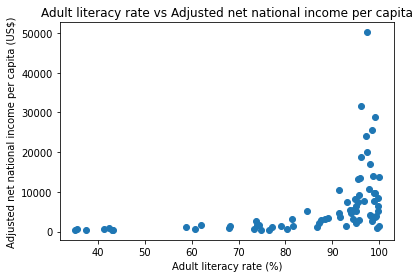

In [10]:
#1
income=[]
literacy=[]
for row in csv: 
  if isNumeric(row[2]) and isNumeric(row[12]):
    income.append(float(row[2]))
    literacy.append(float(row[12]))
print(income)
print(literacy)

#2
ax=plt.axes()
ax.set_title('Adult literacy rate vs Adjusted net national income per capita')
ax.set_xlabel('Adult literacy rate (%)')
ax.set_ylabel('Adjusted net national income per capita (US$)')
ax.plot(literacy, income, 'o')

## Q2

Write and run code blocks that
1. Define symbolic variables `m` and `b`
2. Copy your `sqerror()` function from the prelab.
3. Run the `sqerror()` function with your data from Q1 with coefficients `m` and `b`.  Save the result to `err`.
4. Compute `err_m` and `err_b` the partial derivatives of `err`.
5. Use `sympy.solvers.linsolve()` to find the `m` and `b` of the line of best fit.
6. Make a plot of your data again, but this time include the line of best fit.



In [6]:
#1
m=sympy.Symbol('m')
b=sympy.Symbol('b')

#2
def sqerror(xvalues,yvalues,slope,intercept):
  total=0
  for i in range(len(xvalues)): 
    x=xvalues[i]
    y=yvalues[i]
    error=slope*x+intercept-y
    total=total+error**2
  return total

#3
err=sqerror(literacy,income,m,b)

#4
err_m=sympy.diff(err,m)
err_b=sympy.diff(err,b)

#5
sympy.solvers.linsolve([err_m,err_b],(m,b))

FiniteSet((207.35539353688, -10847.2686300605))

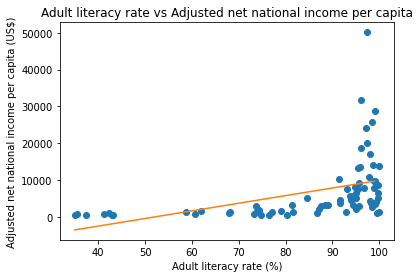

In [11]:
#6
x=np.arange(35,100)
def l(x):
  return (207.35539353688)*x - 10847.2686300605
ax=plt.axes()
ax.set_title('Adult literacy rate vs Adjusted net national income per capita')
ax.set_xlabel('Adult literacy rate (%)')
ax.set_ylabel('Adjusted net national income per capita (US$)')
ax.plot(literacy, income, 'o')
ax.plot(x, l(x))

## Q3
Some data fits a linear model better than others. Since we already have an error function available, we can see how well the best line fits the data.

1. Take the `m` and `b` values of best fit that you solved for in Q2.  Compute the `sqerror()` for those values.
2. Compare to one or more of your groupmates.  Can you infer from your squared error whose data fits a line better?  What differences would you need to correct for in order to get a meaningful comparison?  Refer to specific differences between your datasets.

In [8]:
#1
sqerror(literacy, income, 207.35539353688, (-10847.2686300605))

4358058011.304689

One of my groupmates looked at adjusted net national income per capita and income share held by highest 20%. Her squared error is 1830.86. The other groupmate looked at fertility rate and female labor force rate. Her squared error is 14731.62. Both of their squared errors are smaller than mine, and by looking at her graph, the data of the first groupmate fit a line better.

Since the sum of the squared errors is sensitive to how big the numbers in the data set are, given a data set (x,y) and the set of points (10x, 10y), the sum of the squared errors for this set is 100 times bigger. Thus, to make a meaningful comparison of the data, we should perform an appropriate normalisation technique for the data set. For example, we could scale the x and y values to a certain range. My y values are very big while, my groupmates have relatively smaller y values. 

## Afterword:

Of course, mathematicians figured out how to do this years ago. There are some slick algebra shortcuts that you'll learn in later statistics courses.  There are also pre-written algorithms for all of this.  Try this one, for instance. Check that it gives the same slope and intercept that you found.


In [9]:
from sklearn.linear_model import LinearRegression

xvalues=literacy
yvalues=income

# refit the x data to be a column instead of a row
x=np.array(xvalues).reshape((len(xvalues),1))
y=np.array(yvalues)

# create a linear regression object and fit it to x,y
model=LinearRegression().fit(x,y)

# print the coef and intercept methods from the object
print(f'slope={model.coef_}')
print(f'intercept={model.intercept_}')

slope=[207.35539354]
intercept=-10847.26863006056
